# Chapter 4

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Hard
### 4H2

In [62]:
d = pd.read_csv('../data/Howell1.csv', sep=';', header=0)
d2 = d[d.age < 18]
d2 = d2.sort_values('weight')
with pm.Model() as m4H2:
    sigma = pm.Uniform('sigma', 0, 50)
    alpha = pm.Normal('alpha', 140, 100)
    beta = pm.Normal('beta', 10, 10)
    mu = pm.Deterministic('mu', alpha + beta * d2.weight)
    height = pm.Normal('height', mu, sigma, observed = d2.height)
    trace_m4H2 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha, sigma_interval__]
100%|██████████| 2000/2000 [00:03<00:00, 515.42it/s]
The acceptance probability does not match the target. It is 0.8936988804809947, but should be close to 0.8. Try to increase the number of tuning steps.


In [63]:
pm.summary(trace_m4H2).head()

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,58.201083,1.409810,0.052034,55.452191,60.931330,708.0,1.000070
beta,2.720789,0.068552,0.002576,2.591079,2.855628,704.0,1.000637
sigma,8.555221,0.455792,0.011888,7.739834,9.527687,1415.0,0.999750
mu__0,69.771034,1.152668,0.041491,67.495254,72.004364,740.0,0.999928
mu__1,71.390827,1.118015,0.040032,69.210835,73.625226,747.0,0.999904


100%|██████████| 200/200 [00:00<00:00, 1619.93it/s]


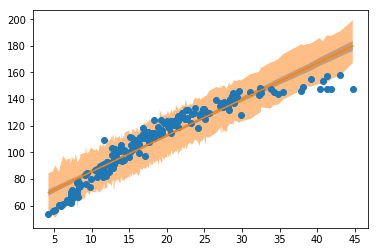

In [78]:
samples = pm.trace_to_dataframe(trace_m4H2)
obs_hpd = pm.hpd(pm.sample_ppc(trace_m4H2, 200, m4H2)['height'])
mu_hpd = pm.hpd(trace_m4H2['mu'])
plt.plot(d2.weight, d2.height, 'o')
plt.plot(d2.weight, samples.alpha.mean() + samples.beta.mean() * d2.weight)
plt.fill_between(d2.weight, mu_hpd[:,0], mu_hpd[:,1], alpha = 0.5)
plt.fill_between(d2.weight, obs_hpd[:,0], obs_hpd[:,1], alpha = 0.5)

### 4H3

In [82]:
with pm.Model() as m4H3:
    sigma = pm.Uniform('sigma', 0, 50)
    alpha = pm.Normal('alpha', 178, 100)
    beta = pm.Normal('beta', 10, 10)
    mu = pm.Deterministic('mu', alpha + beta * np.log(d2.weight))
    height = pm.Normal('height', mu, sigma, observed = d2.height)
    trace_m4H3 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha, sigma_interval__]
100%|██████████| 2000/2000 [00:09<00:00, 219.20it/s]
The number of effective samples is smaller than 25% for some parameters.


100%|██████████| 200/200 [00:00<00:00, 1815.31it/s]


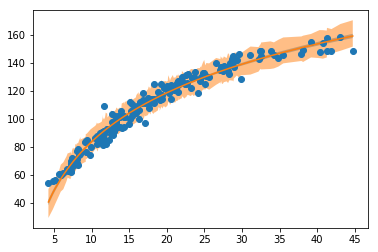

In [86]:
samples = pm.trace_to_dataframe(trace_m4H3)
obs_hpd = pm.hpd(pm.sample_ppc(trace_m4H3, 200, m4H3)['height'])
mu_hpd = pm.hpd(trace_m4H3['mu'])
plt.plot(d2.weight, d2.height, 'o')
plt.plot(d2.weight, samples.alpha.mean() + samples.beta.mean() * np.log(d2.weight))
plt.fill_between(d2.weight, mu_hpd[:,0], mu_hpd[:,1], alpha = 0.5)
plt.fill_between(d2.weight, obs_hpd[:,0], obs_hpd[:,1], alpha = 0.5)

In [90]:
pm.summary(trace_m4H3).head()

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,-32.241342,2.018878,0.083580,-36.000893,-28.034699,464.0,1.002214
beta,50.311060,0.705852,0.029348,48.928784,51.704001,466.0,1.001765
sigma,4.717689,0.256432,0.007472,4.224330,5.195664,999.0,1.001733
mu__0,40.583385,1.024062,0.041398,38.318623,42.368445,483.0,1.002549
mu__1,47.175556,0.936872,0.037613,45.286187,48.983159,489.0,1.002598
